In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#sns.set_theme(style="whitegrid")

In [2]:
#import iterative_params as ip
#ip.replicate_file("CHIMES_0.6/Data/iterCorr1_Param.dat","CHIMES_0.6/Data/input.in")

In [4]:
def reformat_grah_file(name_in,name_out):
    with open(name_out,"w") as k:
        with open(name_in,"r") as f:
            while True:
                line = f.readline()
                if(not line):
                    break
                line=line.strip()
                k.write(",".join(line.split()).strip()+"\n")


def get_graph_data(pref,name,ab_list=None,include_t = True):
    reformat_grah_file(pref+name+"/"+name+".graph",pref+name+"/"+name+"_rf.graph")
    data = pd.read_csv(pref+name+"/"+name+"_rf.graph",sep=",",engine="python")
    col_list = []
    if not ab_list:
        return data
    elif include_t:
        col_list.append("t(Myrs)")
    col_list = ["t(Myrs)"]+["t(yrs)"] + ab_list 
    data.drop(data.tail(1).index,inplace=True) # drop last n=1 rows (supressing final drop (???) )
    data.drop(data.head(1).index,inplace=True) # drop first n=1 rows (supressing initial peak (???) )
    data["t(yrs)"] = data["t(Myrs)"]*1e6
    return data[col_list]

def get_deriv_data(pref,name,ab_list=None,include_t = True):
    reformat_grah_file(pref+name+"/"+name+".deriv",pref+name+"/"+name+"_rf.deriv")
    data = pd.read_csv(pref+name+"/"+name+"_rf.deriv",sep=",",engine="python")
    col_list = []
    if not ab_list:
        return data
    elif include_t:
        col_list.append("t(Myrs)")
    col_list = ["t(Myrs)"]+["t(yrs)"] + ab_list 
    data.drop(data.tail(1).index,inplace=True) # drop last n=1 rows (supressing final drop (???) )
    data.drop(data.head(1).index,inplace=True) # drop first n=1 rows (supressing initial peak (???) )
    data["t(yrs)"] = data["t(Myrs)"]*1e6
    return data[col_list]


def get_log_values(logpath,to_text = False):
    
    ans = {}
    sc = None
    with open(logpath,"r") as f:
        while True:
            line = f.readline()
            if(not line):
                break
            if "---" in line:
                continue
            line = line.strip()
            if(line.startswith("*")):
                sc = line.split()[-1]
                ans[sc]={}
                if(to_text):
                    ans[sc]=""
            else:
                if(to_text):
                    ans[sc] = ans[sc] + "| " +line + " |   "
                else:
                    ln = line.split(":")
                    ans[sc][ln[0].strip()] = float(ln[1].strip())
    
    
    return ans


    

['tit_1117_1  c:1.476e-06  c+:5.068e-04  o:5.082e-04\n', 'tit_1117_2  c:2.502e-04  c+:1.389e-06  o:2.515e-04\n']


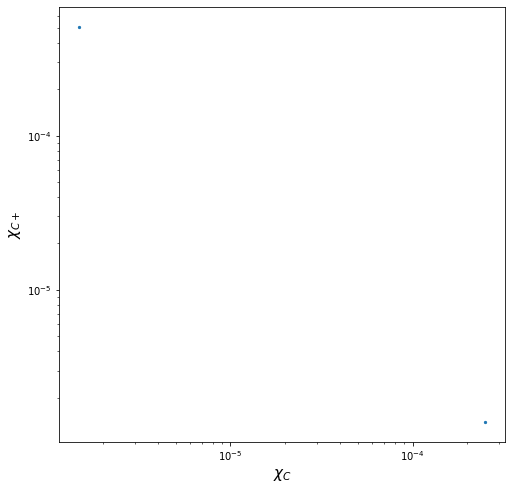

In [19]:
def plot_info(path_info,path_img):
    lines =[]
    with open(path_info,"r") as f:
        lines = f.readlines()
    
    lines = [l for  l in lines if not l.startswith("#")]
    print(lines)
    lines = [l.split()[1:] for l in lines]
    x,y = np.array([[float(l[0].split(":")[1]),float(l[1].split(":")[1])] for l in lines]).T
    
    
    #PLOTTING
    plt.figure(figsize=(8,8))
    plt.scatter(x,y,s=5)
    plt.xlabel("$\chi_C$",fontsize=15)
    plt.ylabel("$\chi_{C+}$",fontsize=15)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig(path_img,bbox_inches="tight")
    
    return x,y
    

x,y=plot_info("CHIMES_0.6/Out/tit_1117/tit_1117.info","")   

In [6]:
pref = "CHIMES_0.6/Out/"
interest_ab = ["h","h2","hcn","oh","h3+","h2o","c","co","nh3","electr","c-c3h","ch4","hnc","cn","ch","hco+","c+","sh","s","c4h2","ch5o+"]

reff_vals = get_log_values("CHIMES_0.6/Data/log_paramgrid.log",True)

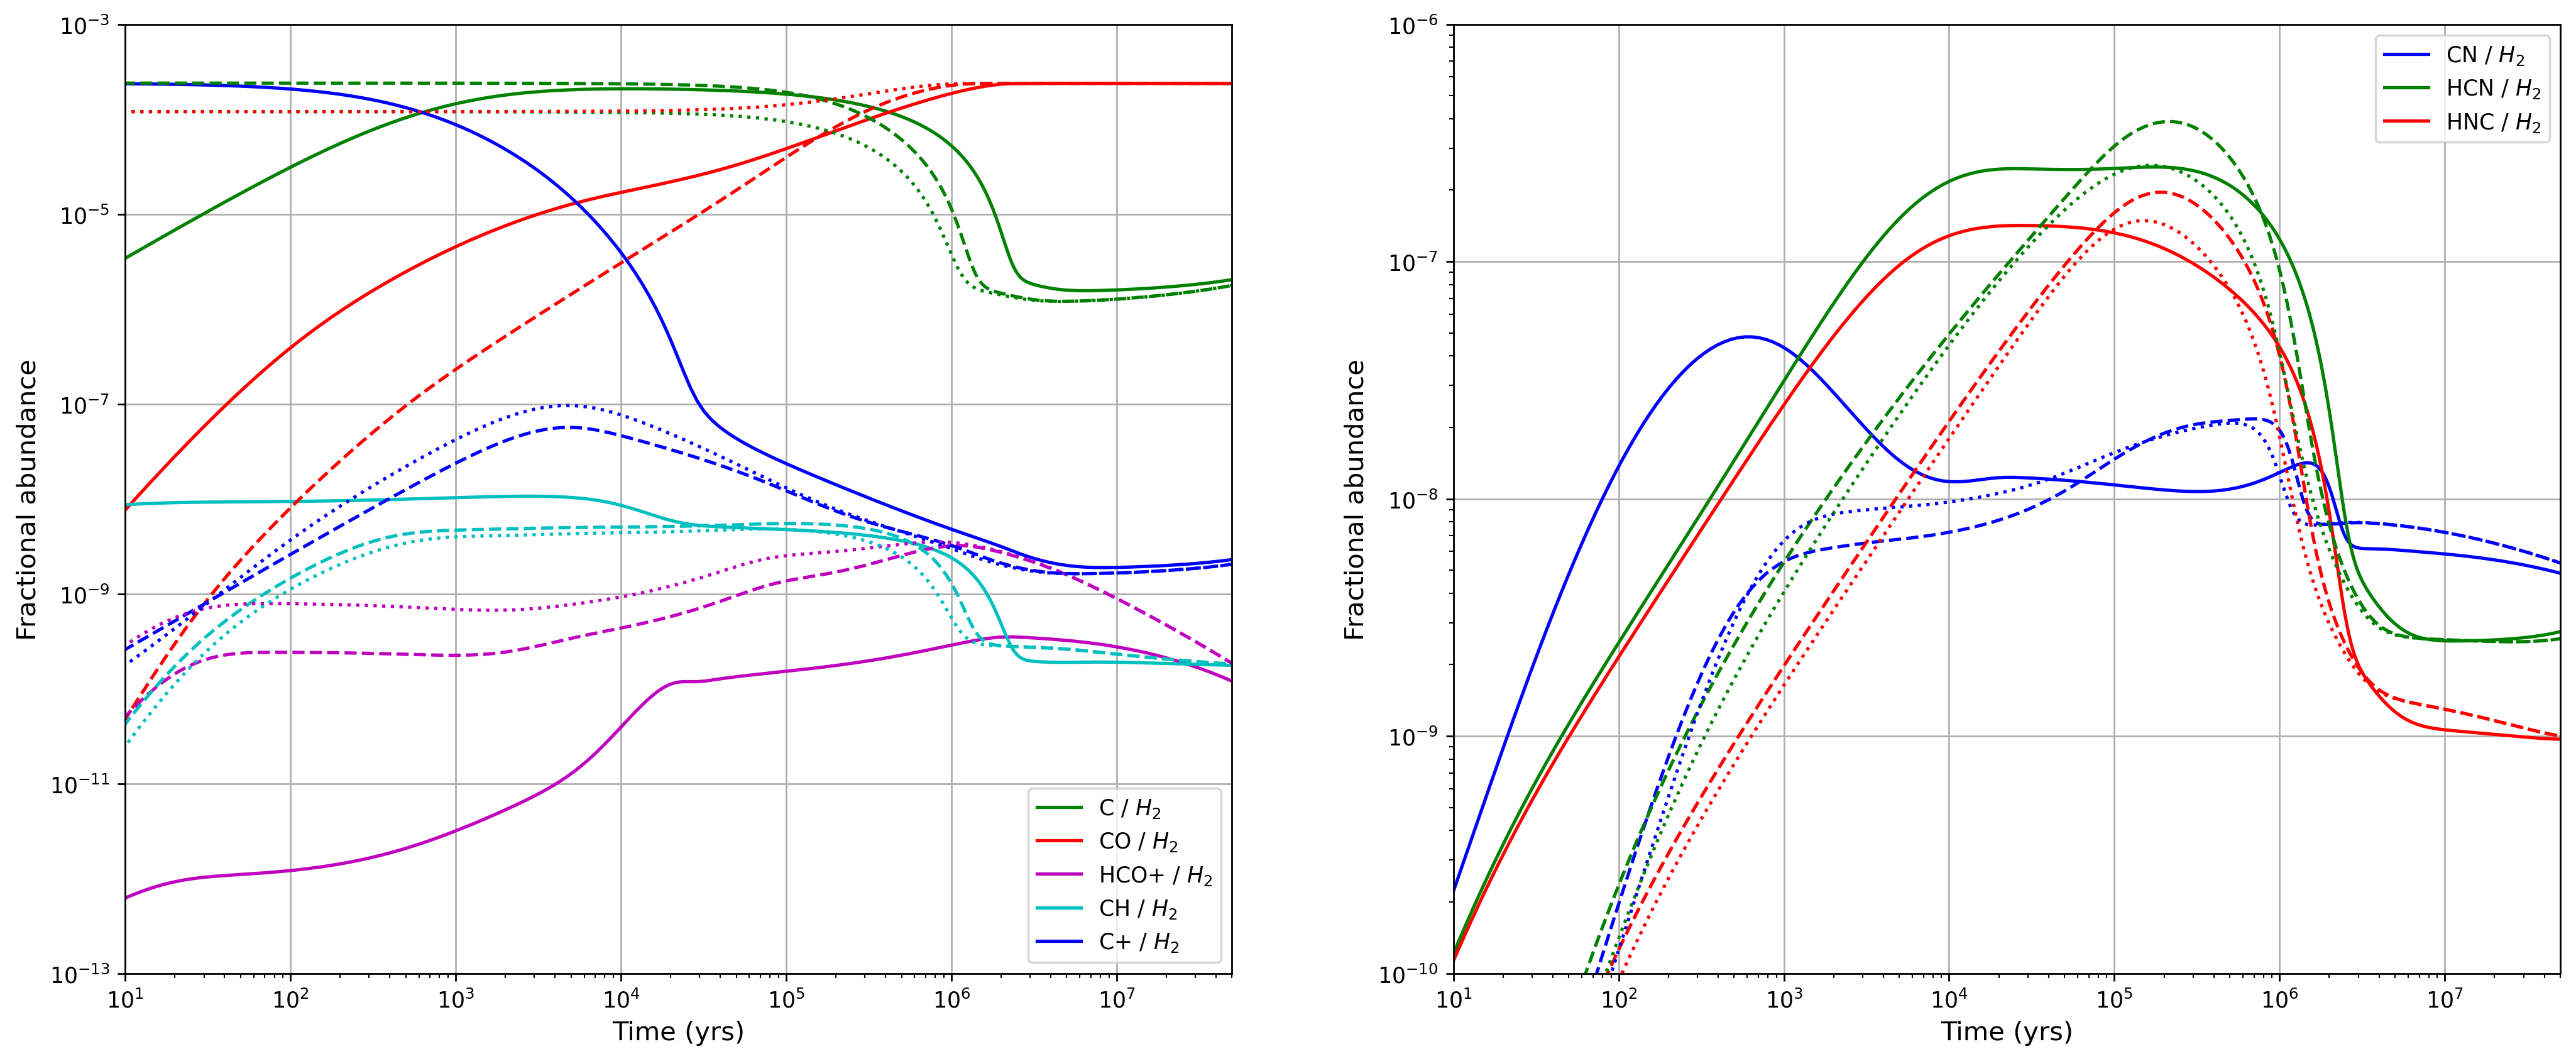

In [9]:
plt.figure(figsize=(20,8),dpi=250)
plt.subplot(1,2,2)
sc_colzi = "iterCorr4" # colzi paper, all C in C+ ()
ddbb_colzi = get_graph_data(pref,sc_colzi,ab_list=interest_ab)

sc_colzi_c = "iterCorr5"
ddbb_colzi_c = get_graph_data(pref,sc_colzi_c,ab_list=interest_ab)

sc_colzi_co = "iterCorr6"
ddbb_colzi_co = get_graph_data(pref,sc_colzi_co,ab_list=interest_ab)
#plt.title(reff_vals[sc],fontsize = 15)

plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["cn"]/ddbb_colzi["h2"],c="b",label="CN / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hcn"]/ddbb_colzi["h2"],c="g",label="HCN / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hnc"]/ddbb_colzi["h2"],c="r",label="HNC / $H_2$")

plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["cn"]/ddbb_colzi_c["h2"],c="b",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hcn"]/ddbb_colzi_c["h2"],c="g",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hnc"]/ddbb_colzi_c["h2"],c="r",linestyle="--")


plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["cn"]/ddbb_colzi_co["h2"],c="b",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hcn"]/ddbb_colzi_co["h2"],c="g",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hnc"]/ddbb_colzi_co["h2"],c="r",linestyle=":")
plt.xlabel("Time (yrs)",fontsize=12)
plt.ylabel("Fractional abundance",fontsize=12)
plt.yscale("log")
plt.xlim(10,5e7)
plt.xscale("log")
plt.ylim(1e-10,1e-6)
plt.legend()
plt.grid()
#plt.tick_params(labeltop=True, labelright=True)

plt.subplot(1,2,1)


#plt.title(reff_vals[sc],fontsize = 15)

plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["c"]/ddbb_colzi["h2"],c="g",label="C / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["co"]/ddbb_colzi["h2"],c="r",label="CO / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hco+"]/ddbb_colzi["h2"],c="m",label="HCO+ / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["ch"]/ddbb_colzi["h2"],c="c",label="CH / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["c+"]/ddbb_colzi["h2"],c="b",label="C+ / $H_2$")

plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["c"]/ddbb_colzi_c["h2"],c="g",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["co"]/ddbb_colzi_c["h2"],c="r",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hco+"]/ddbb_colzi_c["h2"],c="m",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["ch"]/ddbb_colzi_c["h2"],c="c",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["c+"]/ddbb_colzi_c["h2"],c="b",linestyle="--")

plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["c"]/ddbb_colzi_co["h2"],c="g",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["co"]/ddbb_colzi_co["h2"],c="r",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hco+"]/ddbb_colzi_co["h2"],c="m",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["ch"]/ddbb_colzi_co["h2"],c="c",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["c+"]/ddbb_colzi_co["h2"],c="b",linestyle=":")


plt.xlabel("Time (yrs)",fontsize=12)
plt.ylabel("Fractional abundance",fontsize=12)
plt.yscale("log")
plt.xlim(10,5e7)
plt.xscale("log")
plt.ylim(1e-13,1e-3)
plt.legend()
plt.grid()
#plt.tick_params(labeltop=True, labelright=True)

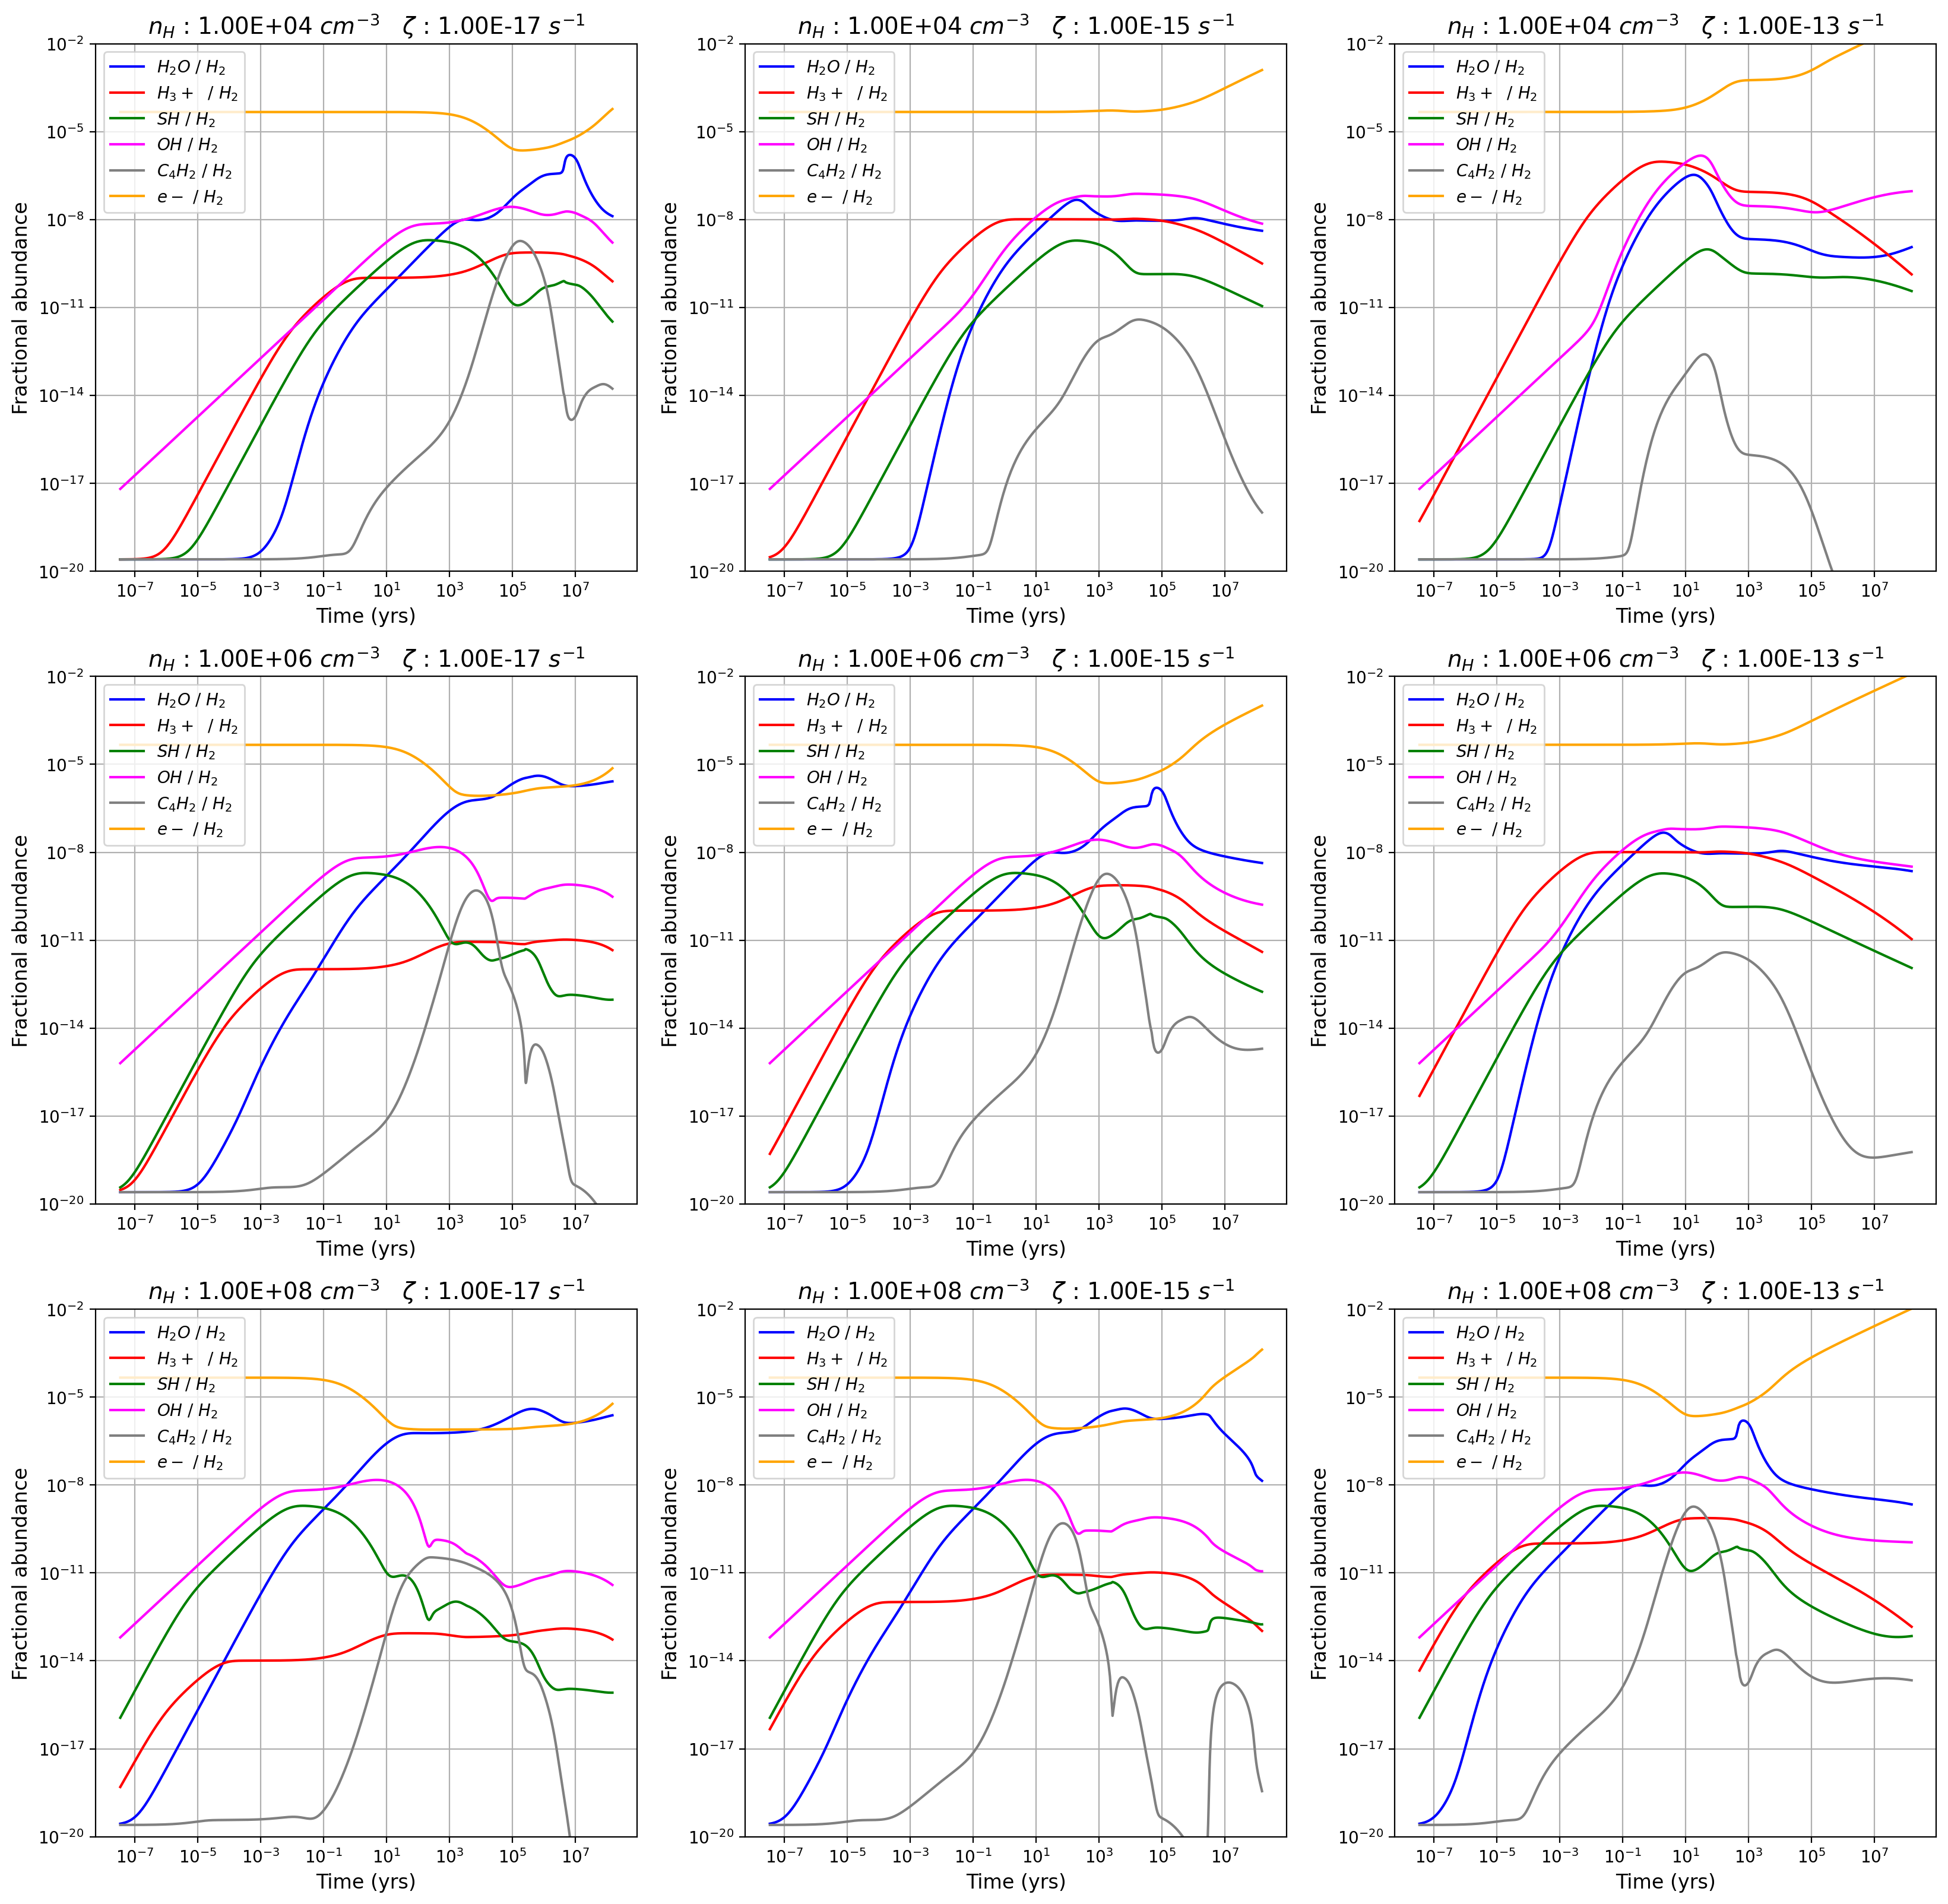

In [9]:
plt.figure(figsize=(20,20),dpi=200)

for i in range(1,10):
    plt.subplot(3,3,i)
    sc = "paramgrid{}".format(i)
    ddbb = get_graph_data(pref,sc,ab_list=interest_ab)
    newtitle =reff_vals[sc].replace("densh","$n_H$").replace("zeta","$\zeta$").replace("|   |","$cm^{-3}$  ").replace("|","").strip()+" $s^{-1}$" 
    plt.title(newtitle,fontsize = 14)
    plt.plot(ddbb["t(yrs)"],ddbb["h2o"]/ddbb["h2"],c="b",label="$H_2O$ / $H_2$")
    #plt.plot(ddbb["t(yrs)"],ddbb["cn"]/ddbb["h2"],c="cyan",label="$CN$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h3+"]/ddbb["h2"],c="r",label="$H_3+$  / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["sh"]/ddbb["h2"],c="g",label="$SH$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["oh"]/ddbb["h2"],c="magenta",label="$OH$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["c4h2"]/ddbb["h2"],c="grey",label="$C_4H_2$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["electr"]/ddbb["h2"],c="orange",label="$e-$ / $H_2$")
    plt.xlabel("Time (yrs)",fontsize=12)
    plt.ylabel("Fractional abundance",fontsize=12)
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.ylim(1e-20,1e-2)
    plt.legend(loc=2)

In [22]:
print()

$n_H$ : 1.00E+08 $cm^{-3}$   $\zeta$ : 1.00E-13 $s^{-1}$


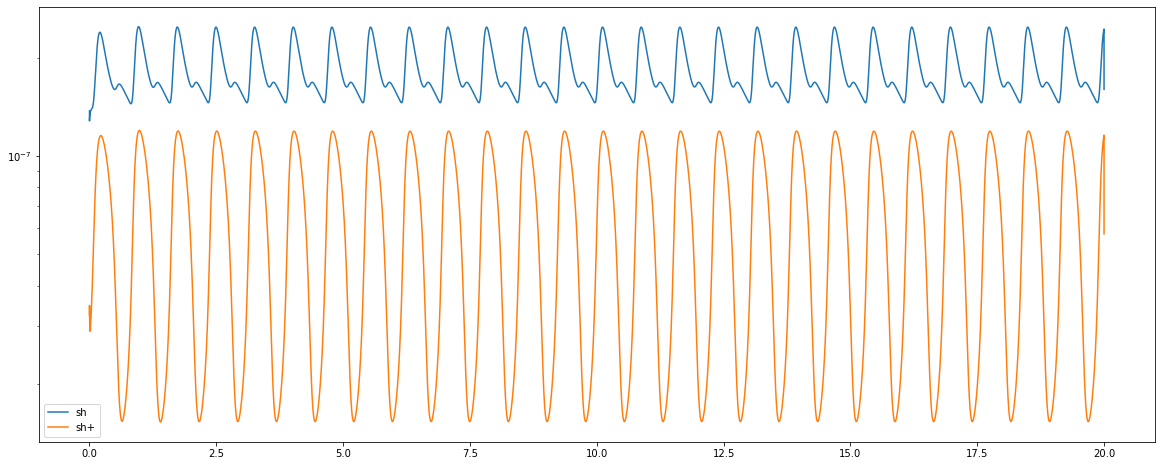

In [10]:
plt.figure(figsize=(20,8))
for l in elems[:10]:
    plt.plot(data2["t(Myrs)"],data2[l],label=l)

plt.yscale("log")
plt.legend()

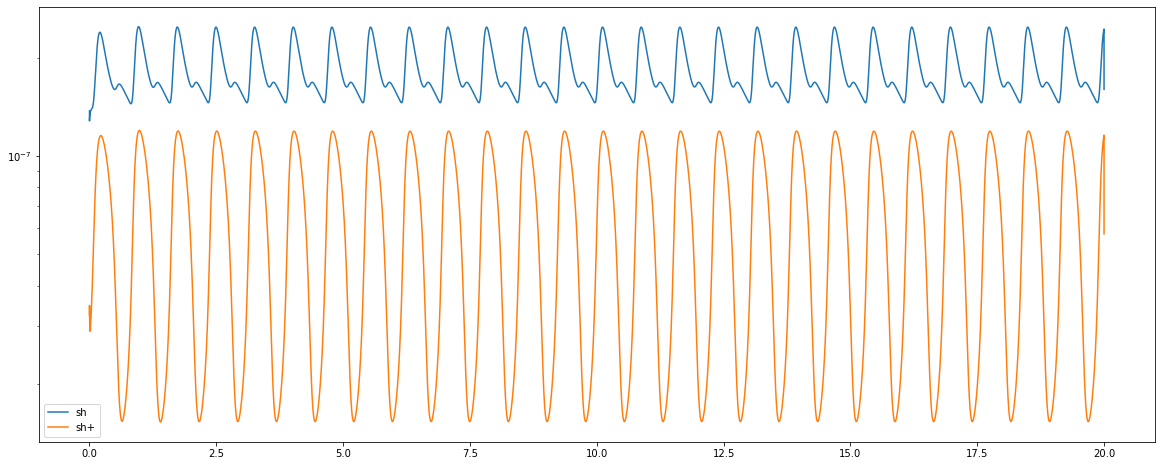

In [11]:
plt.figure(figsize=(20,8))
for l in elems[:10]:
    plt.plot(data2["t(Myrs)"],data2[l],label=l)

plt.yscale("log")
plt.legend()

In [10]:
derivtest = get_deriv_data(pref,"testout")
graphtest = get_graph_data(pref,"testout")

In [11]:
graphtest["t(Myrs)"]

0       3.168877e-14
1       3.485764e-14
2       3.834341e-14
3       4.217775e-14
4       4.639552e-14
            ...     
4282    1.998649e+01
4283    1.999149e+01
4284    1.999649e+01
4285    2.000000e+01
4286    2.000000e+01
Name: t(Myrs), Length: 4287, dtype: float64

In [12]:
derivtest["t(Myrs)"]

0       3.168877e-14
1       3.485764e-14
2       3.834341e-14
3       4.217775e-14
4       4.639552e-14
            ...     
4281    1.998149e+01
4282    1.998649e+01
4283    1.999149e+01
4284    1.999649e+01
4285    2.000000e+01
Name: t(Myrs), Length: 4286, dtype: float64

In [16]:
convfactor = 31556925216000
dt = np.array([ (graphtest["t(Myrs)"][i+1]-graphtest["t(Myrs)"][i]) for i in range(len(graphtest["t(Myrs)"])-1) ])
def manual_deriv(arr):
    return np.array([ (arr[i+1]-arr[i])/dt[i] for i in range(len(arr)-2) ])

In [14]:
derivtest["hco"]

0       4.772246e-22
1       4.772366e-22
2       4.772498e-22
3       4.772643e-22
4       4.772802e-22
            ...     
4281    4.025481e-23
4282    4.025336e-23
4283    4.025191e-23
4284    4.025045e-23
4285    4.024942e-23
Name: hco, Length: 4286, dtype: float64

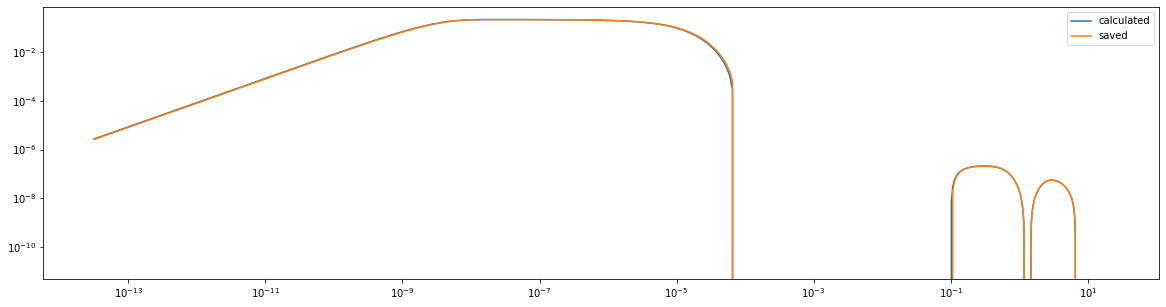

In [17]:
choice = "sh"
md= manual_deriv(graphtest[choice])
plt.figure(figsize=(20,5))
plt.plot(derivtest["t(Myrs)"][:-1],md,label="calculated")
plt.plot(derivtest["t(Myrs)"][:-1],derivtest[choice][:-1]*convfactor,label="saved")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [105]:
np.mean(derivtest[choice][:-1]/md)

3.166844441351664e-14

In [110]:
1/(3600*24*365*1e6)

3.1709791983764584e-14

3.1688765402688214e-14

In [20]:
!pip3 install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
